---
---
---
# LONG SHORT-TERM MEMORY (LSTM)
---
---
---

---
---
# LSTM APPLICATION: TESLA STOCK FORECAST
---
---

---
1-) Business Problem (İş Problemi)

2-) Data Understanding (Veriyi Anlamak)

3-) Data Preparation (Veriyi Hazırlamak)

4-) Modelling (Modelleme)

5-) Evalation (Değerlendirme)

6-) Using it to Predict (Tahmin İçin Kullanılması)

---

1-) Business Problem (İş Problemi)

Amaç; Teslanın borsadaki hisse senedi değerlerini tahmin etmeyi hedefliyoruz.

---


- **Date:** İlgili İşlem Gününün tarihini temsil etmektedir.
- **Open:** İlgili işlem gününe ait Hisse başlangıç fiyatını temsil etmektedir.
- **High:** İlgili işlem gününe ait en yüksek fiyatı temsil etmektedir.
- **Low:** İlgili işlem gününe ait en düşük fiyatı temsil etmektedir.
- **Close:** İlgili işlem gününde hisse senedinin kapanış fiyatını temsil etmektedir.
- **Adj Close** İlgili işlem gününe ait hisse senedinin düzeltilmiş kapanış fiyatını temsil etmektedir. 
- **Volume:** İlgili işlem gününe ait işlem hacmi bilgisini temsil etmektedir.

2-) Data Understanding (Veriyi Anlamak)

2.1-) Data Understanding (Veriyi Anlamak)

![](CNN_Story_Of_The_Dataset.png)

In [116]:
# GEREKLİ KÜTÜPHANELER

# Veriyi Okuma ve işleme için;
import numpy             as np
import pandas            as pd
import tensorflow        as tf
import matplotlib.pyplot as plt

# Model Değerlendirme için;
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics       import mean_squared_error

# Model için;

from tensorflow.keras.models              import Sequential
from tensorflow.keras.layers              import Dense,LSTM,Dropout
from tensorflow.keras.callbacks           import ModelCheckpoint,EarlyStopping

# Warning kapatmak için;
import warnings
warnings.filterwarnings("ignore")

# Tensorflow Warning Engelleme için;
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"
tf.get_logger().setLevel('ERROR')

In [117]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [118]:
def check_df(dataframe, head=5):
    print("###Shape###")
    print(dataframe.shape)
    print("###Types###")
    print(dataframe.dtypes)
    print("###Head###")
    print(dataframe.head(head))
    print("###Tail###")
    print(dataframe.tail(head))
    print("###NA###")
    print(dataframe.isnull().sum())
    print("###Quantiles###")
    numeric_columns = dataframe.select_dtypes(include=[np.number])
    print(numeric_columns.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [119]:
check_df(df,5)

###Shape###
(2416, 7)
###Types###
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
###Head###
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
###Tail###
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01

3-) Data Preparation (Veriyi Hazırlamak)

In [120]:
df["Date"] = pd.to_datetime(df["Date"])

In [121]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [122]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [123]:
tesla_df = df[["Date","Close"]]

In [124]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [125]:
print("Minimum Tarih: ", tesla_df["Date"].min())
print("Maximum Tarih: ", tesla_df["Date"].max())

Minimum Tarih:  2010-06-29 00:00:00
Maximum Tarih:  2020-02-03 00:00:00


In [126]:
tesla_df.index = tesla_df["Date"]

In [127]:
tesla_df.head()

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001


In [128]:
tesla_df.drop("Date", axis=1, inplace=True)
tesla_df.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [129]:
result_df = tesla_df.copy()

In [130]:
type(result_df)

pandas.core.frame.DataFrame

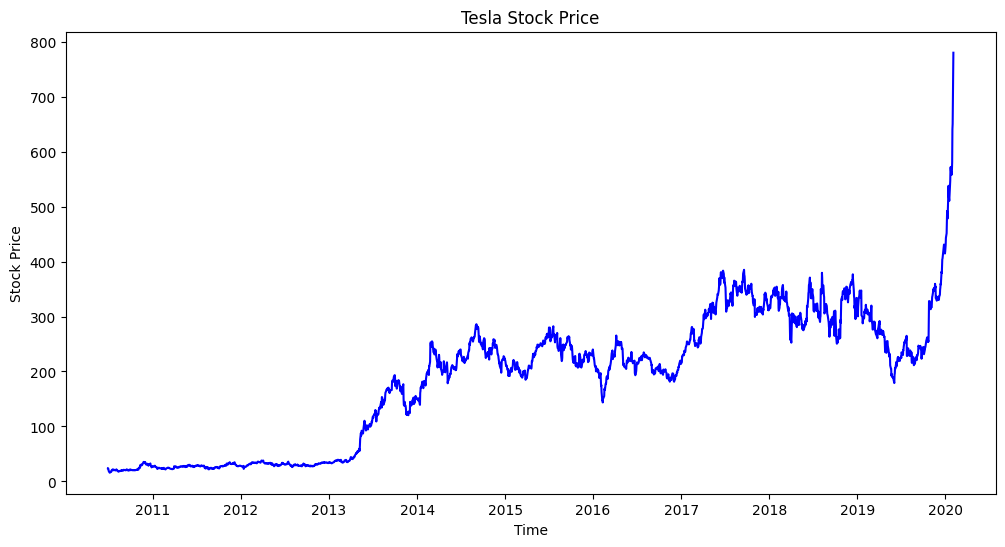

In [131]:
plt.figure(figsize=(12,6))
plt.plot(tesla_df["Close"], color ="blue");
plt.ylabel("Stock Price")
plt.xlabel('Time')
plt.title('Tesla Stock Price')
plt.show()

In [132]:
#numpy array dönüştürme
tesla_df = tesla_df.values
type(tesla_df)

numpy.ndarray

In [133]:
tesla_df[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

In [134]:
tesla_df.dtype

dtype('float64')

In [135]:
tesla_df = tesla_df.astype('float32')
tesla_df.dtype

dtype('float32')

In [136]:
# train-test ayrımının yapılması
def split_data(dataframe, test_size):
    position = int(round(len(dataframe)*(1-test_size)))
    train    = dataframe[:position]
    test     = dataframe[position:]
    return train,test,position

In [137]:
train, test, pos = split_data(tesla_df, 0.20)

In [138]:
print(train.shape,test.shape)

(1933, 1) (483, 1)


In [139]:
#standartlaştırma
scaler_train = MinMaxScaler(feature_range=(0,1))
train        = scaler_train.fit_transform(train)
scaler_test  = MinMaxScaler(feature_range=(0,1))
test         = scaler_test.fit_transform(test)

In [140]:
train[:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [141]:
test[:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [142]:
#feature türetme , 20 gün önceden bugüne kadar veri alalım diye belirleyelim.
def create_features(data,lookback):
    X,Y = [], []
    for i in range(lookback,len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])

    return np.array(X), np.array(Y)

In [143]:
lookback = 20

In [144]:
# Train veri seti
X_train, y_train = create_features(train,lookback)

# Test  veri seti
X_test, y_test   = create_features(test,lookback)

In [145]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [146]:
X_train[0:5]

array([[0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
        0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566],
       [0.02174973, 0.01668472, 0.0092091 , 0.00083966, 0.        ,
        0.00449621, 0.00433369, 0.0033857 , 0.00633803, 0.01094258,
        0.011078  , 0.01310942, 0.0165493 , 0.01218851, 0.01197183,
        0.01408451, 0.01486999, 0.01394908, 0.01286566, 0.01332611],
       [0.01668472, 0.0092091 , 0.00083966, 0.        , 0.00449621,
        0.00433369, 0.0033857 , 0.00633803, 0.01094258, 0.011078  ,
        0.01310942, 0.0165493 , 0.01218851, 0.01197183, 0.01408451,
        0.01486999, 0.01394908, 0.01286566, 0.01332611, 0.01232395],
       [0.0092091 , 0.00083966, 0.        , 0.00449621, 0.00433369,
        0.0033857 , 0.00633803, 0.01094258, 0.011078  , 0.01310942,
        0.0165493 , 0.01218851, 0.01197183, 0

In [147]:
y_train[0:5]

array([0.01332611, 0.01232395, 0.01121344, 0.01386782, 0.01665764],
      dtype=float32)

In [148]:
#lstm 3 boyutlu veri ister;
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test  = np.reshape(X_test, (X_test.shape[0] ,1,X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)

print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


4-) Modelling (Modelleme)

In [149]:
model = Sequential()
model.add(LSTM(units=50, #nöron sayısı
               activation='relu',                       
               input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1)) #output

In [150]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# Optimizasyon ve Değerlendirme Metriklerinin Ayarlanması
model.compile(loss='mean_squared_error',optimizer='adam')

In [152]:
callbacks = [EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min'),
             ModelCheckpoint(filepath='mymodel.keras',monitor='val_loss',mode='min',
                             save_best_only=True,save_weights_only=False,verbose=1)]

In [153]:
history = model.fit(x               = X_train,
                    y               = y_train,
                    epochs          = 100,
                    batch_size      = 20,
                    validation_data = (X_test,y_test),
                    callbacks       = callbacks,
                    shuffle         = False)

Epoch 1/100


83/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074    
Epoch 1: val_loss improved from inf to 0.00448, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0084 - val_loss: 0.0045
Epoch 2/100
81/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064
Epoch 2: val_loss improved from 0.00448 to 0.00447, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0045
Epoch 3/100
75/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050
Epoch 3: val_loss improved from 0.00447 to 0.00412, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 4/100
62/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 4: val_loss improved from 0.00412 to 0.00392, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 5/100
78/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044
Epoch 5: val_loss improved from 0.00392 to 0.00369, saving mod

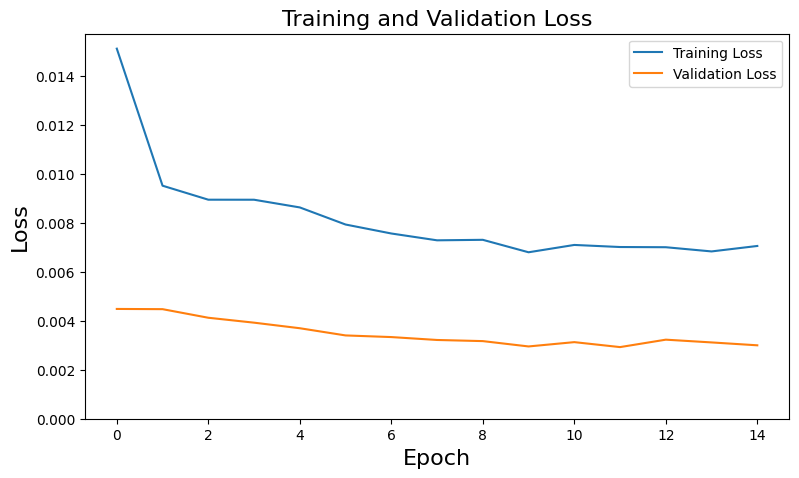

In [154]:
# grafik
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],    label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()

5-) Evalation (Değerlendirme)

In [155]:
#Normalleştirilmiş verinin hatası
loss = model.evaluate(X_test,y_test,batch_size=20)
print("\nTest Loss: %.2f%%" % (100.0*loss))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.0025

Test Loss: 0.30%


In [156]:
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [157]:
train_predict = scaler_train.inverse_transform(train_predict)
test_predict  = scaler_test.inverse_transform(test_predict)
y_train = scaler_train.inverse_transform(y_train)
y_test  = scaler_test.inverse_transform(y_test)

In [158]:
# Train veri setine ait RMSE değeri
train_rmse = np.sqrt(mean_squared_error(y_train,train_predict))
# Test  veri setine ait RMSE değeri
test_rmse  = np.sqrt(mean_squared_error(y_test,test_predict))

In [159]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 14.985486030578613
Test RMSE: 32.89963912963867


6-) Using it to Predict (Tahmin İçin Kullanılması)

In [160]:
train_prediction_df = result_df[lookback:pos] #ilk veriler için nan'lar var gözlemleyebilmek için 20'den sonra başlatıyoruz.
train_prediction_df["Predicted"] = train_predict
train_prediction_df.head()

,Close,Predicted
Date,,
2010-07-28,20.719999,42.592316
2010-07-29,20.350000,42.592316
2010-07-30,19.940001,42.592316
2010-08-02,20.920000,42.592316
2010-08-03,21.950001,42.592316


In [162]:
test_prediction_df = result_df[pos+lookback:] #ilk veriler için nan'lar var gözlemleyebilmek için 20'den sonra başlatıyoruz.
test_prediction_df["Predicted"] = test_predict
test_prediction_df.head()

,Close,Predicted
Date,,
2018-04-03,267.529999,324.344421
2018-04-04,286.940002,320.434662
2018-04-05,305.720001,319.558868
2018-04-06,299.299988,319.399750
2018-04-09,289.660004,318.510437


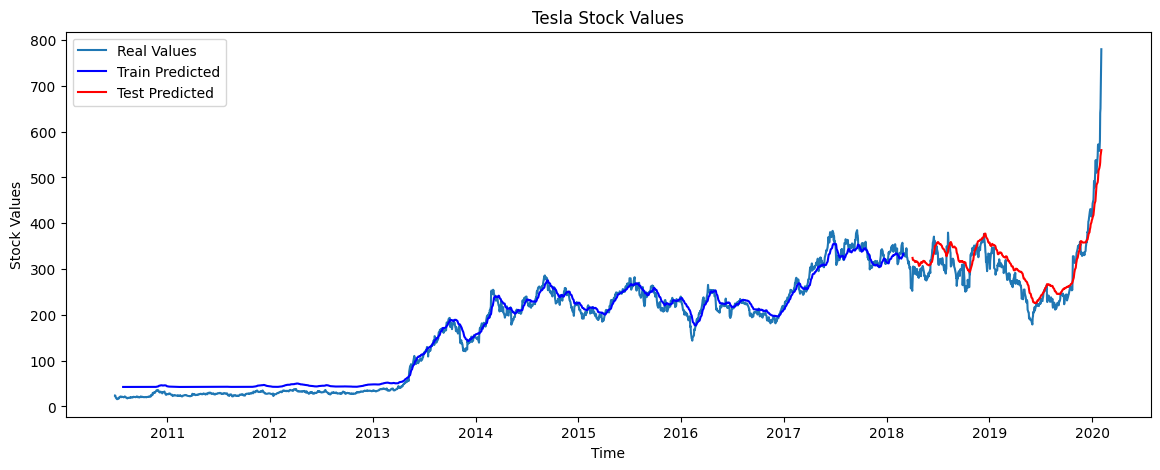

In [163]:
#train ve test tahminlerinin ayrı ayrı görselleştirilme işlemi
plt.figure(figsize=(14,5))
plt.plot(result_df,label='Real Values')
plt.plot(train_prediction_df["Predicted"],color='blue',label = "Train Predicted")
plt.plot(test_prediction_df["Predicted"], color='red' ,label = "Test Predicted")
plt.title("Tesla Stock Values")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()